## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 1*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Invertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas para remover y restaurar la imagen.



#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

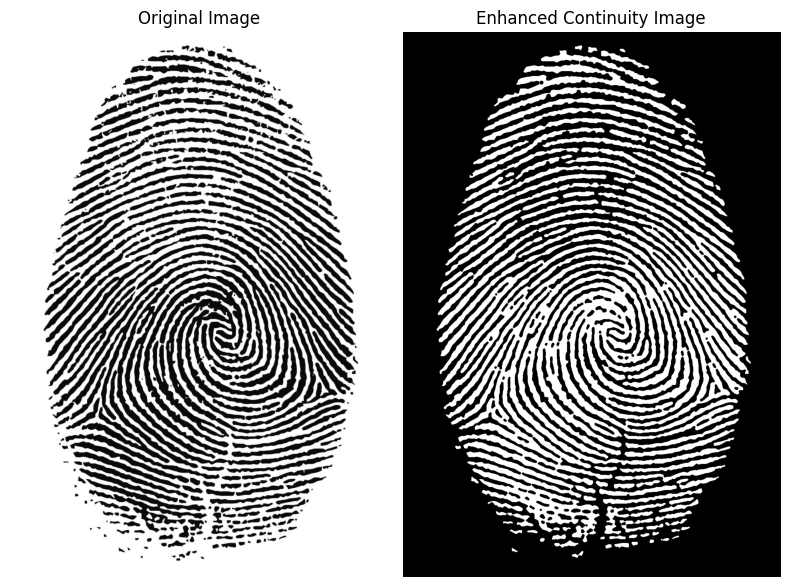

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io, filters, util
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion
from skimage.morphology import skeletonize, binary_dilation, label


# Load the image - replace 'path_to_image' with the actual path to your image
image_path = 'img/fingerprint.jpeg'
image = io.imread(image_path, as_gray=True)

# Apply a Gaussian filter to smooth the image
smoothed_image = filters.gaussian(image, sigma=1)

# Binarize the image using Otsu's method
thresh = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh

# Invert the image
inverted_image = util.invert(binary_image)

# Clean the image with morphological operations
selem = morphology.disk(2) # This might need to be adjusted
cleaned_image = morphology.remove_small_objects(inverted_image, min_size=64)

# Opening to remove small noise
opened_image = binary_opening(cleaned_image, selem)
# Closing to connect ridges
closed_image = binary_closing(opened_image, selem)
# Dilation to enhance the ridges
dilated_image = binary_dilation(closed_image, selem)
# Erosion to thin out the ridges
eroded_image = binary_erosion(dilated_image, selem)


# For enhancing continuity of lines, a closing operation can be useful
# Define a larger structuring element for this purpose
selem_large = morphology.disk(3)  # Adjust size as needed for your image

# Apply closing to the whole image to close gaps in ridges
closed_image = morphology.binary_closing(cleaned_image, selem_large)

# If the top part of the image has more discontinuities, focus on that region
h, w = image.shape
top_part = closed_image[:int(h*0.2)]  # Adjust the 0.2 if needed to select the correct top part

# Perform additional closing operations on the top part if necessary
top_part_closed = morphology.binary_closing(top_part, morphology.disk(5))

# Replace the enhanced top part back into the original cleaned image
closed_image[:int(h*0.2)] = top_part_closed

# Display the result
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Enhanced Continuity Image')
plt.axis('off')
plt.tight_layout()
plt.show()


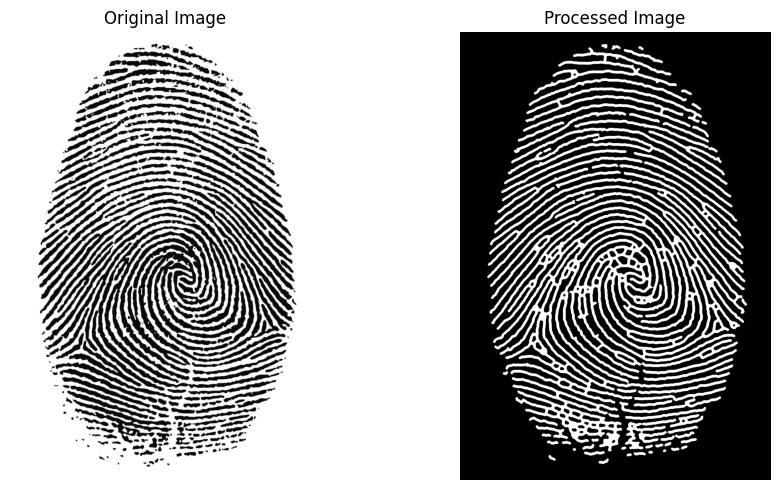

In [77]:
# Skeletonize the image
skeleton = skeletonize(closed_image)

# Dilate the skeleton to restore ridge thickness
dilated_skeleton = binary_dilation(skeleton, morphology.disk(4))

# Apply Gaussian smoothing to the dilated skeleton
# Use a small sigma to avoid over-smoothing
smoothed_skeleton = filters.gaussian(dilated_skeleton, sigma=0.5)

# Convert the smoothed skeleton back to a binary image
final_image = smoothed_skeleton > 0.5

# Perform a closing operation to bridge small gaps
closed_skeleton = binary_closing(final_image, morphology.disk(3))

# Display the original and processed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(closed_skeleton, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()